In [ ]:
http://127.0.0.1:5000/
        engine = create_engine(r'sqlite:///C:\Users\Michael\Documents\BuildWeek\Data-Science\TESS_Flask_App\App_TESS\db.sqlite3', echo=False)

In [2]:
df = pd.read_csv('dataproducts_example.csv')

In [3]:
df.head(0)

,Unnamed: 0,TIC ID,dataURL


In [4]:
import pandas as pd
from flask_sqlalchemy import SQLAlchemy
from astropy.io import fits
import matplotlib.pyplot as plt

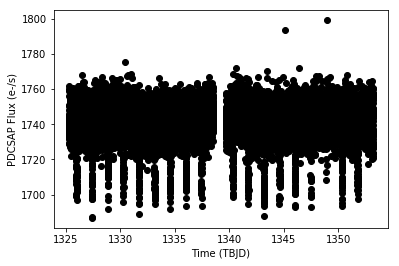

In [9]:
input_tic = 231663901
urls_for_input = df[df['TIC ID'] == input_tic]['dataURL'].tolist()
for url in urls_for_input:     
    count = 0
    fits_file = ('https://mast.stsci.edu/api/v0.1/Download/file?uri=' + url)
                
                # print(fits.info(fits_file), "\n")
                # print(fits.getdata(fits_file, ext=1).columns)
                
    with fits.open(fits_file, mode="readonly") as hdulist:
        tess_bjds = hdulist[1].data['TIME']
        sap_fluxes = hdulist[1].data['SAP_FLUX']
        pdcsap_fluxes = hdulist[1].data['PDCSAP_FLUX']
                
        fig, ax = plt.subplots()

        ax.plot(tess_bjds, pdcsap_fluxes, 'ko')

        ax.set_ylabel("PDCSAP Flux (e-/s)")
        ax.set_xlabel("Time (TBJD)")

        plt.savefig(fname=str(str(input_tic) + '_' + str(count) + '.png'))


In [ ]:
import pandas as pd
from flask_sqlalchemy import SQLAlchemy
from astropy.io import fits
import matplotlib.pyplot as plt
# from .models import DB, Visual_Table

# fetch Light Curve visual and basic data
def get_lightcurve(input_tic):
    # Getting urls for all dataproducts associated with TIC ID given by user
    try:

        # Next line need to become a DB query 
        # urls_for_input = dataproducts[dataproducts['TIC ID'] == input_tic][
        # 'dataURL'].tolist()
        try:
#             urls_for_input = Visual_Table.query.filter(Visual_Table.TIC_ID == input_tic)
            urls_for_input = df[df['TIC ID'] == input_tic][
                                'dataURL'].tolist()
        except:
            print('failed to pull')
        
        else:
            for url in urls_for_input:
                count = 0
                
                fits_file = ('https://mast.stsci.edu/api/v0.1/Download/file?uri=' + url)
                
                # print(fits.info(fits_file), "\n")
                # print(fits.getdata(fits_file, ext=1).columns)
                
                with fits.open(fits_file, mode="readonly") as hdulist:
                    tess_bjds = hdulist[1].data['TIME']
                    sap_fluxes = hdulist[1].data['SAP_FLUX']
                    pdcsap_fluxes = hdulist[1].data['PDCSAP_FLUX']
                
                fig, ax = plt.subplots()

                ax.plot(tess_bjds, pdcsap_fluxes, 'ko')

                ax.set_ylabel("PDCSAP Flux (e-/s)")
                ax.set_xlabel("Time (TBJD)")

                plt.savefig(fname=str(input_tic + '_' + count + '.png'))
                
                count = count + 1
    except:
        print('My Bad. Light Curve function is not working.')
        
    return 
    